In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [4]:
sgd2 = SGDClassifier(loss='hinge', random_state=42)
sgd2.fit(x_train_all, y_train_all)
sgd2.score(x_test, y_test)

0.9385964912280702

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=42)
#훈련세트, 테스트세트 분할

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
#훈련세트를 다시 훈련세트,검증세트로 분할

print(len(x_train), len(x_val))

364 91


In [6]:
sgd = SGDClassifier( loss='log_loss', random_state=42 )
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

['mean perimeter' 'mean area']


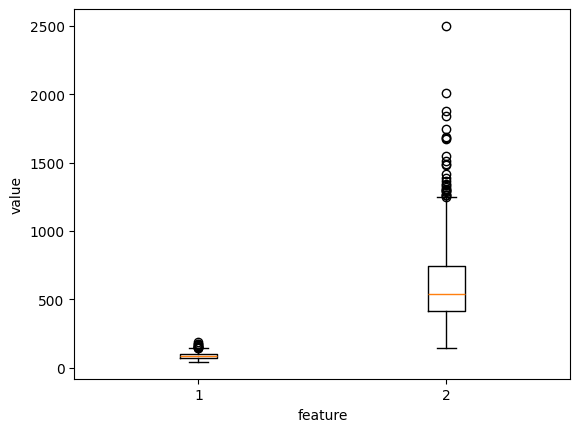

In [7]:
print(cancer.feature_names[[2,3]]) #1,2번 특성의 이름 출력
plt.boxplot(x_train[:, 2:4]) #박스플롯으로 1,2번 특성 그려 스케일 확인
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [8]:
class SingleLayer :
  def __init__(self, learning_rate=0.1) :
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = [] #변화한 가중치 저장할 리스트 생성
    self.lr = learning_rate #학습률

  def forpass(self, x) :
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err) :
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z) :
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100) :
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy()) #처음 가중치 기록(복사해서 추가)
    np.random.seed(42)
    for i in range(epochs) :
      loss = 0
      indexes = np.random.permutation( np.arange(len(x)) )
      for i in indexes :
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad * self.lr #학습률을 적용하여 가중치 업데이트
        self.b -= b_grad
        self.w_history.append(self.w.copy()) #변화한 가중치 기록(복사해서 추가)
        a = np.clip( a, 1e-10, 1-1e-10 )

        loss += -( y[i]*np.log(a) + (1-y[i])*np.log(1-a) )
      self.losses.append(loss/len(y))

  def predict(self, x) :
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y) :
    return np.mean(self.predict(x) == y)

In [9]:
#1. 특성 스케일 조정xx
layer1 = SingleLayer()
layer1.fit(x_train, y_train) #훈련
layer1.score(x_val, y_val) #검증 세트 점수點數

<ipython-input-8-4ccbdb64267e>:19: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


np.float64(0.9120879120879121)

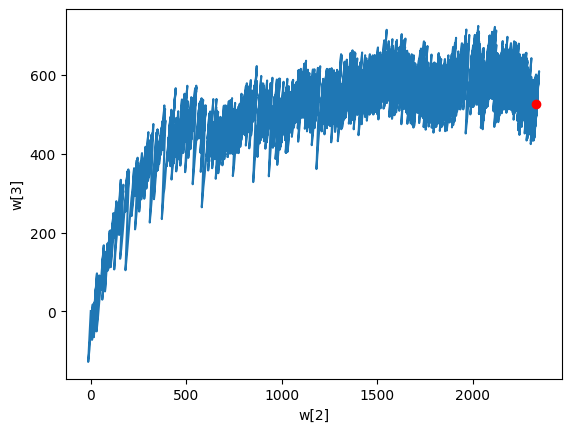

In [10]:
w2 = []
w3 = []
for w in layer1.w_history :
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [11]:
#2. 스케일 조정 - 표준화 전처리
train_mean = np.mean(x_train, axis=0) #훈련세트에 대하여, 한 행(샘플)의 평균
train_std = np.std(x_train, axis=0) #훈련세트에 대하여, 한 행(샘플)의 표준편차
x_train_scaled = (x_train - train_mean) / train_std #훈련 세트의 표준화

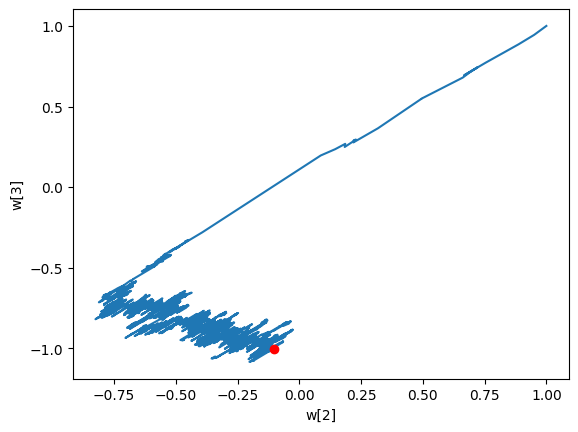

In [12]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train) #스케일 조정한 훈련세트를 넣음
w2 = []
w3 = []
for w in layer2.w_history :
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [13]:
layer2.score(x_val, y_val) #스케일 조정 후 성능 평가
#성능이 좋지 않은 이유 - 검증세트는 표준화 전처리 안 해서

np.float64(0.37362637362637363)

In [14]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

layer2.score(x_val_scaled, y_val)

np.float64(0.967032967032967)

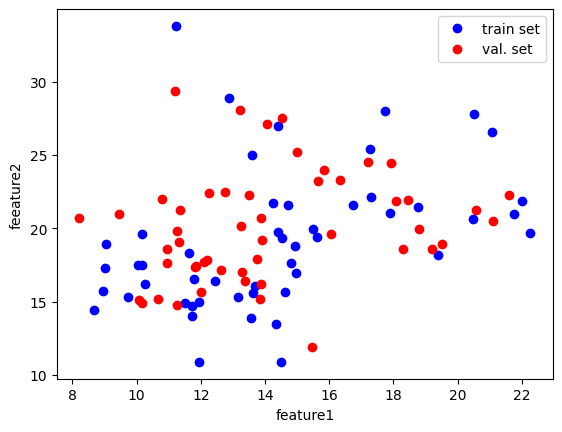

In [15]:
plt.plot(x_train[:50,0], x_train[:50,1], 'bo')
plt.plot(x_val[:50,0], x_val[:50,1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feeature2')
plt.legend(['train set', 'val. set'])
plt.show() #원본 훈련세트(파)와 검증세트(빨)의 산점도

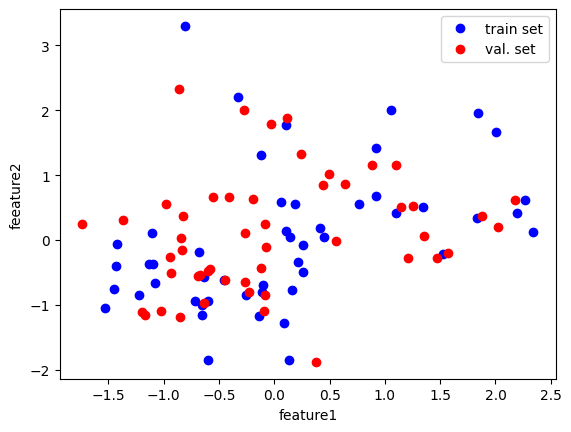

In [16]:
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feeature2')
plt.legend(['train set', 'val. set'])
plt.show() #전처리한 훈련세트(파)와 검증세트(빨)의 산점도

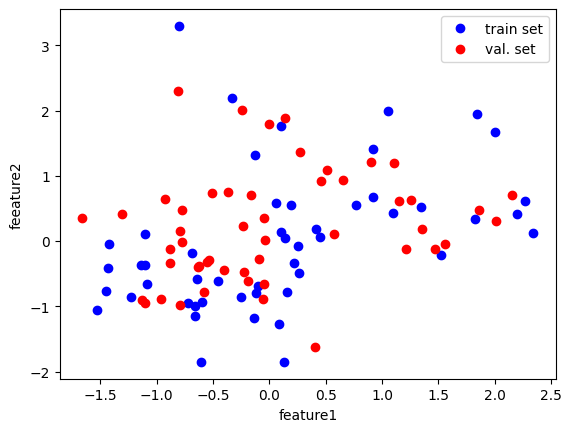

In [17]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feeature2')
plt.legend(['train set', 'val. set'])
plt.show() #전처리한 훈련세트(파)와 훈련세트의 평균,표준편차로 전처리한 검증세트(빨)의 산점도

In [18]:
layer2.score(x_val_scaled, y_val)

np.float64(0.967032967032967)

In [19]:
#검증 손실 추가
class SingleLayer :
  def __init__(self, learning_rate=0.1) :
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate
    self.val_losses = [] #검증 세트의 손실량 저장할 리스트 생성

  def forpass(self, x) :
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err) :
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z) :
    a = 1 / (1 + np.exp(-z))
    return a

  def update_val_loss(self, x_val, y_val) : #검증세트의 손실 계산 매서드
    if x_val is None :
      return
    val_loss = 0
    for i in range(len(x_val)) :
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i] * np.log(a)  +  (1-y_val[i]) * np.log(1-a))
    self.val_losses.append(val_loss / len(y_val))

  def fit(self, x, y, epochs=100, x_val=None, y_val=None) : #x_val y_val 추가
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs) :
      loss = 0
      indexes = np.random.permutation( np.arange(len(x)) )
      for i in indexes :
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad * self.lr
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip( a, 1e-10, 1-1e-10 )

        loss += -( y[i]*np.log(a) + (1-y[i])*np.log(1-a) )
      self.losses.append(loss/len(y))

      self.update_val_loss(x_val, y_val) #검증세트에 대한 손실 계산

  def predict(self, x) :
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y) :
    return np.mean(self.predict(x) == y)

In [20]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

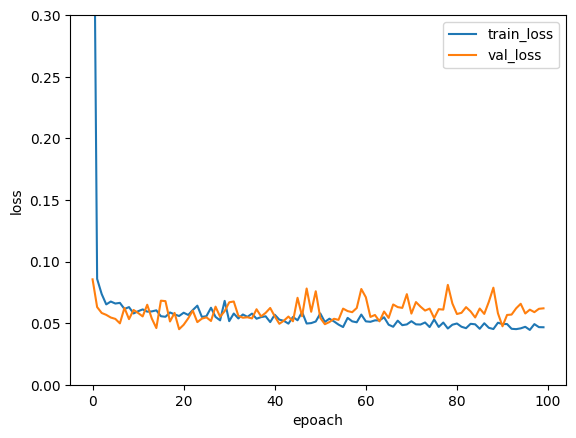

In [21]:
#훈련손실과 검증손실 동시에 표현
#훈련손실 < 검증손실 : 과적합
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.xlabel('epoach')
plt.ylabel('loss')
plt.legend( ['train_loss', 'val_loss'] )
plt.show()

In [22]:
#훈련 조기종료 (약 에포크 20 넘기면 과적합으로 추정되므로)
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

np.float64(0.978021978021978)

In [23]:
#가중치 규제(L1, L2)를 로지스틱 회귀에 적용하기
class SingleLayer :
  def __init__(self, learning_rate=0.1, l1=0, l2=0) : #규제값은 설정 안 하면 0
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate
    self.val_losses = []
    self.l1 = l1 #l1 규제 설정
    self.l2 = l2 #l2 규제 설정

  def forpass(self, x) :
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err) :
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z) :
    a = 1 / (1 + np.exp(-z))
    return a


  def fit(self, x, y, epochs=100, x_val=None, y_val=None) :
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs) :
      loss = 0
      indexes = np.random.permutation( np.arange(len(x)) )
      for i in indexes :
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        # ^^ 변화율에 l1규제(알파*가중치 부호) 또는 l2규제 더하기(알파*가중치)
        self.w -= w_grad * self.lr
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip( a, 1e-10, 1-1e-10 )

        loss += -( y[i]*np.log(a) + (1-y[i])*np.log(1-a) )
      self.losses.append(loss/len(y))

      self.update_val_loss(x_val, y_val)


  def predict(self, x) :
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y) :
    return np.mean(self.predict(x) == y)

  def update_val_loss(self, x_val, y_val) :
    if x_val is None :
      return
    val_loss = 0
    for i in range(len(x_val)) :
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i] * np.log(a)  +  (1-y_val[i]) * np.log(1-a))
    self.val_losses.append(val_loss / len(y_val) + self.reg_loss() ) #페널티항 호출

  def reg_loss(self) : #페널티항 함수
    return self.l1 * np.sum(np.abs(self.w) + self.l2 / 2 * np.sum(self.w**2))

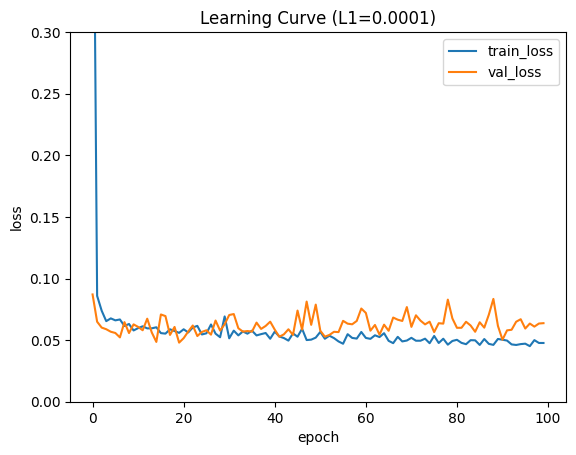

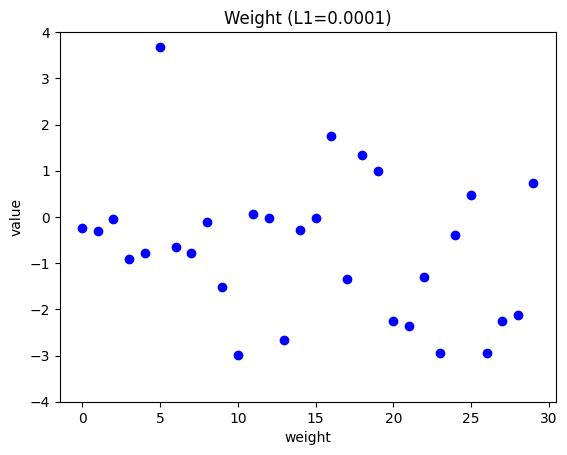

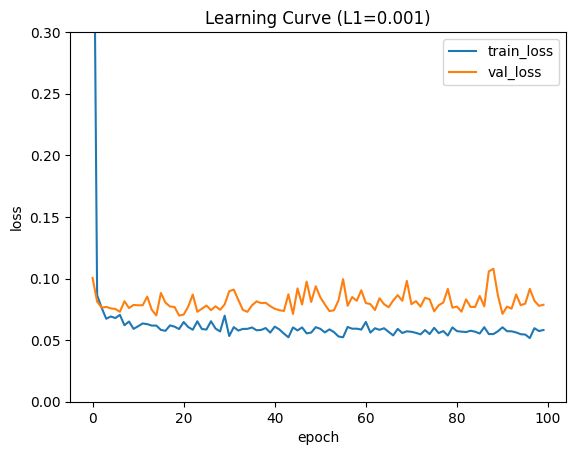

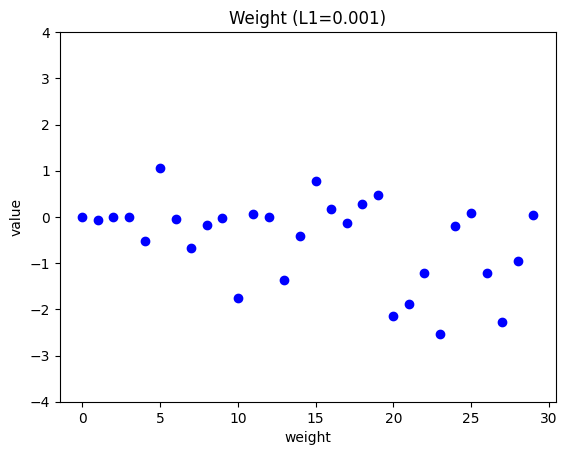

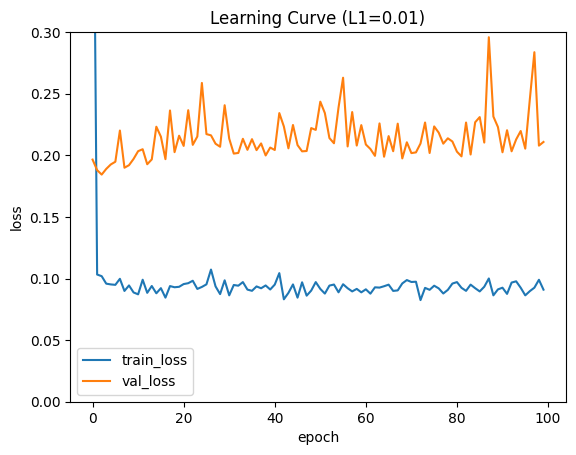

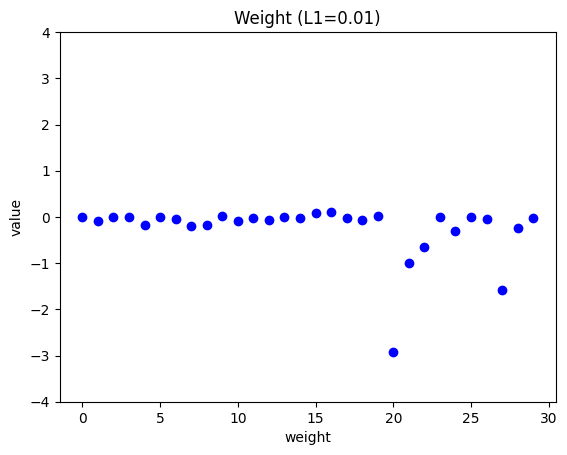

In [24]:
#l1 규제
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list :
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  #훈련세트와 검증세트의 손실 비교
  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title(f'Learning Curve (L1={l1})')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  #가중치 나타냄
  plt.plot(lyr.w, 'bo')
  plt.title(f'Weight (L1={l1})')
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [25]:
#l1=0.001로 하여 성능 확인
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

np.float64(0.978021978021978)

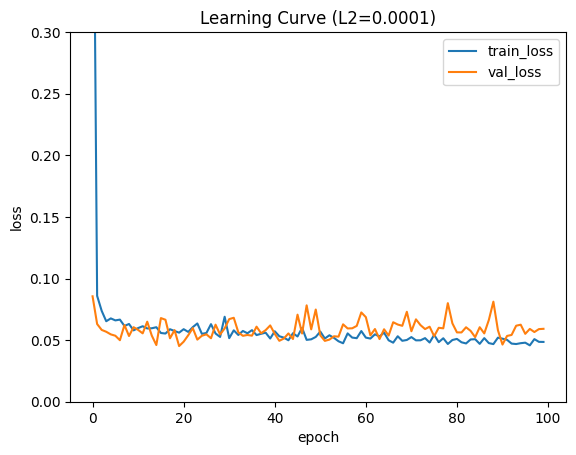

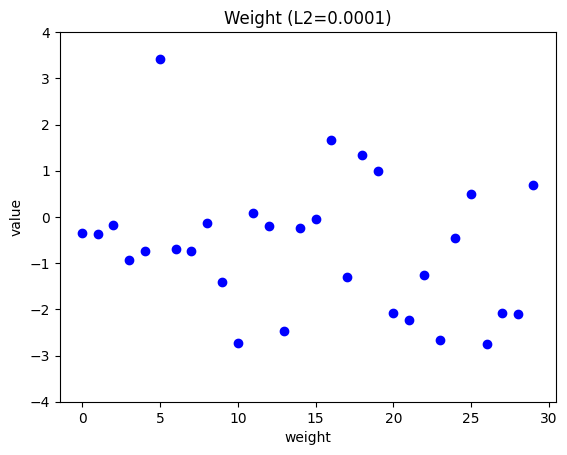

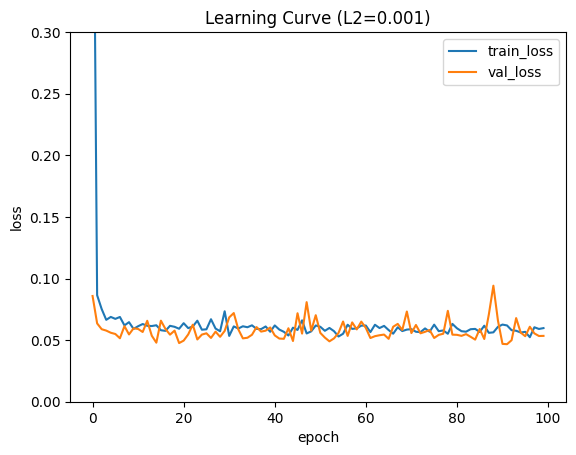

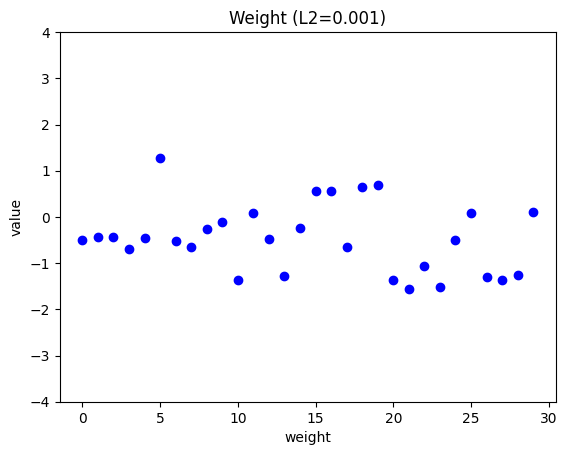

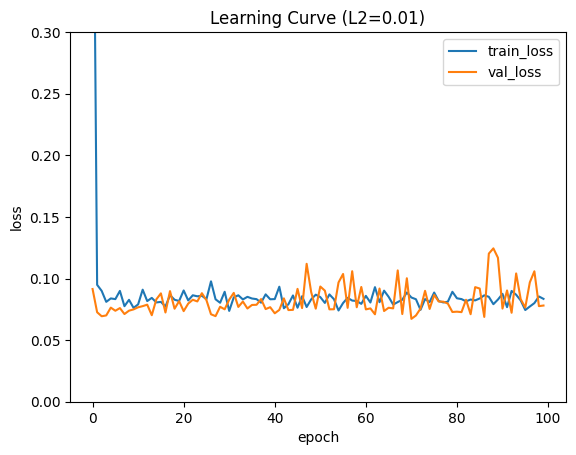

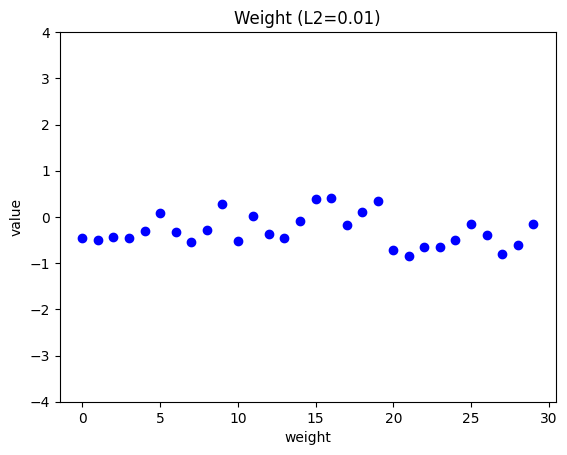

In [26]:
#l2 규제
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list :
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  #훈련세트와 검증세트의 손실 비교
  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title(f'Learning Curve (L2={l2})')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  #가중치 나타냄
  plt.plot(lyr.w, 'bo')
  plt.title(f'Weight (L2={l2})')
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [27]:
#l2=0.01로 하여 성능 확인
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

np.float64(0.978021978021978)

In [28]:
#바르게 예측한 샘플 수
np.sum(layer6.predict(x_val_scaled) == y_val)

np.int64(89)

In [29]:
#SGDClassifier에서 규제 사용하기
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

In [30]:
#k-폴드 교차 검증
validation_scores = []

k = 10
bins = len(x_train) // k

for i in range(k) :
  start = i*bins #해당 폴드의 시작 인덱스(ex: (k,start)=(0,0) (1,10) 등)
  end = (i+1)*bins #마지막 인덱스(=다음 폴드 번호 -1)
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index = list(range(0,start)) + list(range(end, len(x_train_all))) #????
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold, axis=0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std

  lyr = SingleLayer(l2=0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

0.975


In [33]:
#사이킷런을 이용한 교차검증
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10 )
print(np.mean(scores['test_score'])) #^ 파이썬 딕셔너리를 반환하므로 인덱스로 ~

0.850096618357488


In [34]:
#사이킷런 + pipeline을 이용하여 전처리
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


In [36]:
#훈련 폴드의 점수
print(np.mean(scores['train_score']))

0.9875478561631581
